In [55]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import norm

In [57]:
def fetch_historical_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data['Close']

In [58]:
def calculate_mu_sigma(prices, n):
    daily_returns = np.diff(np.log(prices))
    mu = np.mean(daily_returns) * n
    sigma = np.std(daily_returns) * np.sqrt(n)
    return mu, sigma

In [59]:
def plot_prices(dates, prices, title):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label='Prices', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [60]:
def black_scholes_call(S0, K, T, r, sigma):
    # Calculate d1 and d2
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calculate call price
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [61]:
def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))

def binom_EU1(S0, K , T, r, sigma, N, type_ = 'call'):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (  np.exp(r*dt) - d )  /  (  u - d )
    value = 0 
    for i in range(N+1):
        node_prob = combos(N, i)*p**i*(1-p)**(N-i)
        ST = S0*(u)**i*(d)**(N-i)
        if type_ == 'call':
            value += max(ST-K,0) * node_prob
        elif type_ == 'put':
            value += max(K-ST, 0)*node_prob
        else:
            raise ValueError("type_ must be 'call' or 'put'" )
    
    return value*np.exp(-r*T)

[*********************100%***********************]  1 of 1 completed

Price is 2 steps is 39.68
Price is 4 steps is 39.68
Price is 6 steps is 39.68
Price is 8 steps is 39.7
Price is 10 steps is 39.69
Price is 20 steps is 39.7
Price is 50 steps is 39.7
Price is 100 steps is 39.71
Price is 200 steps is 39.71
Price is 300 steps is 39.71
Price is 400 steps is 39.71
Price is 500 steps is 39.71
Price is 600 steps is 39.71
S0: 188.86000061035156, K: 150, T: 0.1095890410958904, r: 0.05, sigma: 0.27955086759377373
The Black-Scholes call option price at t=0 is: 39.71


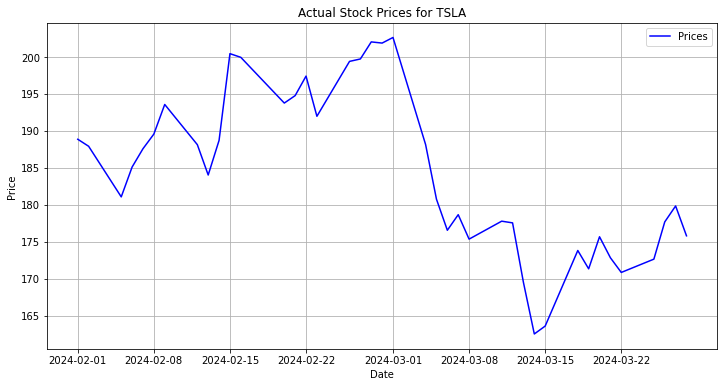

In [62]:
# Parameters
ticker = 'TSLA'  # Stock ticker
start_date = '2024-02-01'  # Historical data start date
end_date = '2024-03-30'  # Historical data end date

# Fetch historical data
hist_prices = fetch_historical_data(ticker, start_date, end_date)
dates = hist_prices.index
historical_prices=hist_prices.values

# Calculate mu and sigma using training data
n = 100  # Granularity of time steps
mu, sigma = calculate_mu_sigma(historical_prices, n)

r = 0.05  # Risk-free rate
strike_price= 150

# Use the last price as the starting point
initial_price = historical_prices[0]

# Find the future stock prices using the binomial model
num_days = len(historical_prices)  # Number of days to simulate
Ns = [2, 4, 6, 8, 10, 20, 50, 100, 200, 300, 400,500, 600]
    

for n in Ns:
    c = binom_EU1(initial_price, strike_price, num_days/365, r,sigma, n)
    print(f'Price is {n} steps is {round(c,2)}')

# Parameters for Black-Scholes
S0 = initial_price  # Current stock price, from the last historical price
K = strike_price    # Strike price
T = num_days / 365  # Time to expiration in years (e.g., 30 days = 30/365)
r = 0.05            # Risk-free interest rate (already defined as r)
sigma = sigma       # Annualized volatility from calculate_mu_sigma

# Debugging print
print(f"S0: {S0}, K: {K}, T: {T}, r: {r}, sigma: {sigma}")
call_price = black_scholes_call(S0, K, T, r, sigma)
print(f"The Black-Scholes call option price at t=0 is: {call_price:.2f}")

#Plot the results
plot_prices(dates, historical_prices, f'Actual Stock Prices for {ticker}')
